IDS 575 MACHINE LEARNING 

FINAL PROJECT
   
**STOCK PRICE PREDICTION**

Submitted By: [Group 2]

Chris Lazarus - 673773993
Deepak Singhal - 672190946
Sanjay Madesha - 662505955

Importing and Downloading Libraries

In [ ]:
pip install missingno

In [ ]:
pip install pmdarima

     |████████████████████████████████| 1.4 MB 12.5 MB/s 
     |████████████████████████████████| 9.8 MB 16.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

Importing Dataset

Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# df = pd.read_csv('C:/Users/clazar5/Desktop/all_stocks_5yr.csv')
df = pd.read_csv('/content/drive/My Drive/IDS575MLGroup2/Project/archive/all_stocks_5yr.csv')
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


Calculating price based on the average of opening and closing stock price for the day

In [ ]:
df['price']=((df['low']) + (df['high']))/2
df.head()

,date,open,high,low,close,volume,Name,price
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,14.875
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,14.635
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,14.305
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,14.595
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,14.060


We will only focus on one stock for understanding the overall trend which will be apple

In [ ]:
df1=df[(df['Name']=="AAPL")]
df1.head()

,date,open,high,low,close,volume,Name,price
1259,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,67.64710
1260,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,68.44210
1261,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,67.86595
1262,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,66.91850
1263,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,66.83280


In [ ]:
df1.count()

date      1259
open      1259
high      1259
low       1259
close     1259
volume    1259
Name      1259
price     1259
dtype: int64

To find any missing value in any of the 8 columns

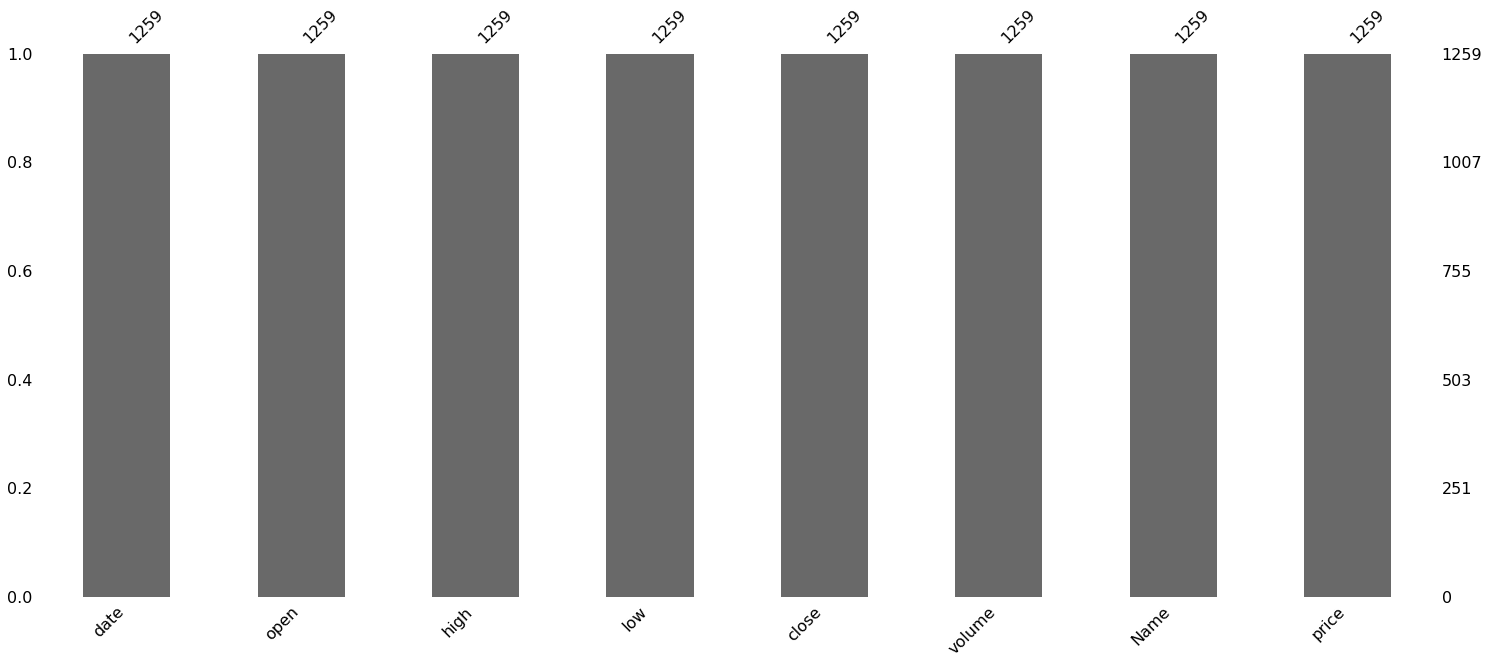

In [ ]:
msno.bar(df1)

Since, all the variables have 1259 datasets, hence no missing values (no null)

Next, Observing the trend of apple stock price overtime.

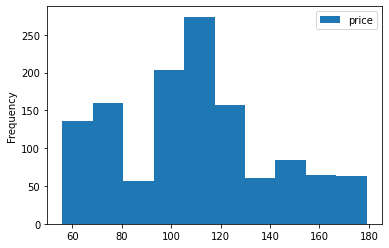

In [ ]:
df1.plot(x="date",y="price", subplots=True,kind="hist")
plt.show()

Scatter plot

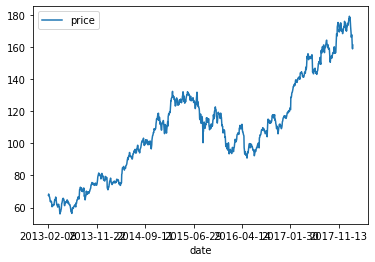

In [ ]:
df1.plot(x="date",y="price", subplots=True,kind="line")
plt.show()

We have calculated the log difference between the **average price** throughout the day and **opening price** of the day. The advantage of this computation of evaluating change is that the computations are symmetrical in both directions.

In [ ]:
df1['log_diff'] = np.log(df1['price']) - np.log(df1['open'])
df1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,open,high,low,close,volume,Name,price,log_diff
1259,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,67.64710,-0.000991
1260,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,68.44210,0.005431
1261,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,67.86595,-0.009320
1262,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,66.91850,0.002608
1263,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,66.83280,0.007101


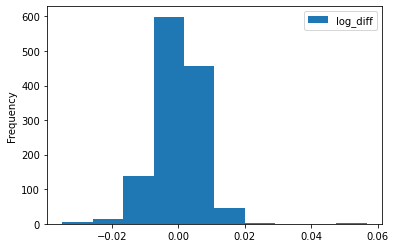

In [ ]:
df1.plot(x="date",y="log_diff", subplots=True,kind="hist")
plt.show()

Now, We are calculating correlation factor between variables

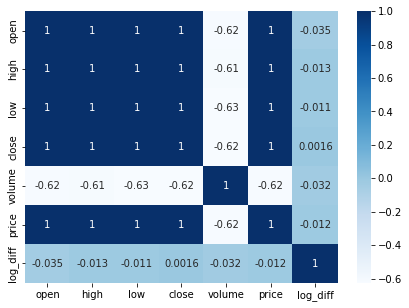

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(df1.corr(),cmap='Blues',annot=True)

By observing above table, we can prices (open, close, high, low, and average) are highly dependent on each other

In [ ]:
df1['open-high'] = df1['open']-df1['high']
df1['open-low'] = df1['open'] - df1['low']
df1['close-high'] = df1['close']-df1['high']
df1['close-low'] = df1['close'] -df1['low']
df1['high-low'] = df1['high'] - df1['low']
df1['open-close'] = df1['open'] - df1['close']
df1.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,date,open,high,low,close,volume,Name,price,log_diff,open-high,open-low,close-high,close-low,high-low,open-close
1259,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,67.64710,-0.000991,-0.6872,0.8214,-0.5472,0.9614,1.5086,-0.1400
1260,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,68.44210,0.005431,-1.2057,0.4643,-0.7157,0.9543,1.6700,-0.4900
1261,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,67.86595,-0.009320,-0.4100,1.6809,-2.0686,0.0223,2.0909,1.6586
1262,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,66.91850,0.002608,-0.9186,0.5700,-0.9472,0.5414,1.4886,0.0286
1263,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,66.83280,0.007101,-1.0172,0.0714,-0.7215,0.3671,1.0886,-0.2957


In [ ]:
df2=df1.copy()
df2 = df2.drop(['open','high','low','close'],axis=1)
df2.head()

,date,volume,Name,price,log_diff,open-high,open-low,close-high,close-low,high-low,open-close
1259,2013-02-08,158168416,AAPL,67.64710,-0.000991,-0.6872,0.8214,-0.5472,0.9614,1.5086,-0.1400
1260,2013-02-11,129029425,AAPL,68.44210,0.005431,-1.2057,0.4643,-0.7157,0.9543,1.6700,-0.4900
1261,2013-02-12,151829363,AAPL,67.86595,-0.009320,-0.4100,1.6809,-2.0686,0.0223,2.0909,1.6586
1262,2013-02-13,118721995,AAPL,66.91850,0.002608,-0.9186,0.5700,-0.9472,0.5414,1.4886,0.0286
1263,2013-02-14,88809154,AAPL,66.83280,0.007101,-1.0172,0.0714,-0.7215,0.3671,1.0886,-0.2957


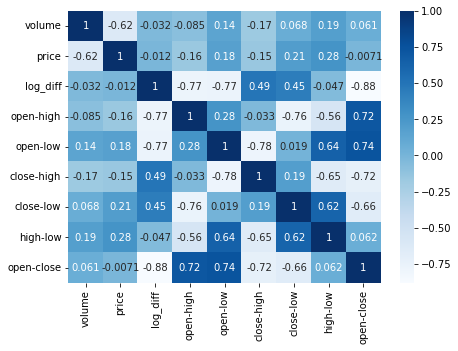

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(df3.corr(),cmap='Blues',annot=True)

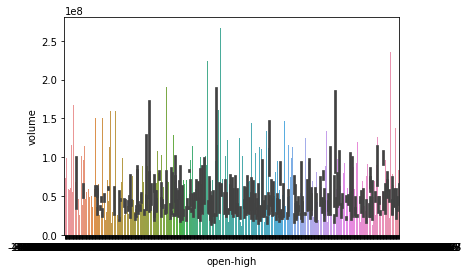

In [ ]:
sns.barplot(x = df1["open-high"], y=df1["volume"])

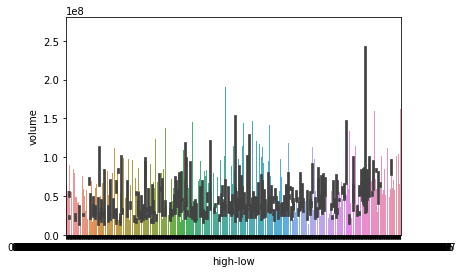

In [ ]:
sns.barplot(x = df1["high-low"], y=df1["volume"])

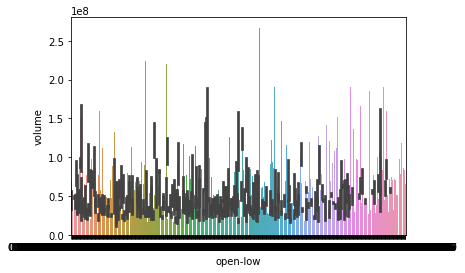

In [ ]:
sns.barplot(x = df1["open-low"], y=df1["volume"])

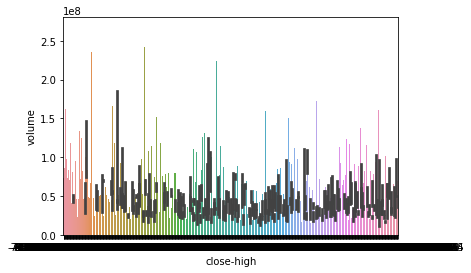

In [ ]:
sns.barplot(x = df1["close-high"], y=df1["volume"])

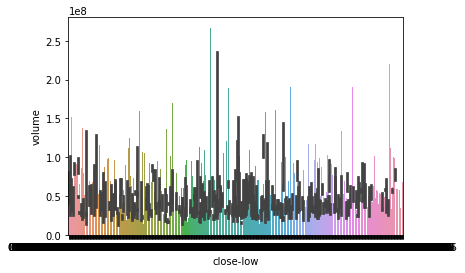

In [ ]:
sns.barplot(x = df1["close-low"], y=df1["volume"])

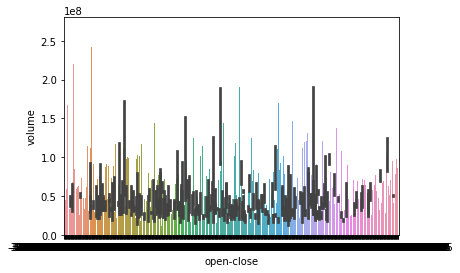

In [ ]:
sns.barplot(x = df1["open-close"], y=df1["volume"])

Outlier 

Linear Regression, KNN, SVM, LSTM

Time series

In [ ]:
# drop all rows with any NaN and NaT values
df3 = df2.dropna()
df3.head()

,date,volume,Name,price,log_diff,open-high,open-low,close-high,close-low,high-low,open-close
1259,2013-02-08,158168416,AAPL,67.64710,-0.000991,-0.6872,0.8214,-0.5472,0.9614,1.5086,-0.1400
1260,2013-02-11,129029425,AAPL,68.44210,0.005431,-1.2057,0.4643,-0.7157,0.9543,1.6700,-0.4900
1261,2013-02-12,151829363,AAPL,67.86595,-0.009320,-0.4100,1.6809,-2.0686,0.0223,2.0909,1.6586
1262,2013-02-13,118721995,AAPL,66.91850,0.002608,-0.9186,0.5700,-0.9472,0.5414,1.4886,0.0286
1263,2013-02-14,88809154,AAPL,66.83280,0.007101,-1.0172,0.0714,-0.7215,0.3671,1.0886,-0.2957


For Time series, we will take average of opening, closing, high and low price of stock


In [ ]:
df3['avgPrice']=((df1['low']) + (df1['high'])+ (df1['open']) + (df1['close']))/4
df3.head()

,date,volume,Name,price,log_diff,open-high,open-low,close-high,close-low,high-low,open-close,avgPrice
1259,2013-02-08,158168416,AAPL,67.64710,-0.000991,-0.6872,0.8214,-0.5472,0.9614,1.5086,-0.1400,67.715650
1260,2013-02-11,129029425,AAPL,68.44210,0.005431,-1.2057,0.4643,-0.7157,0.9543,1.6700,-0.4900,68.379250
1261,2013-02-12,151829363,AAPL,67.86595,-0.009320,-0.4100,1.6809,-2.0686,0.0223,2.0909,1.6586,67.769025
1262,2013-02-13,118721995,AAPL,66.91850,0.002608,-0.9186,0.5700,-0.9472,0.5414,1.4886,0.0286,66.824200
1263,2013-02-14,88809154,AAPL,66.83280,0.007101,-1.0172,0.0714,-0.7215,0.3671,1.0886,-0.2957,66.670275


In [ ]:
# df_permutated = df1.sample(frac=1)

# train_size = 0.7
# train_end = int(len(df_permutated)*train_size)

# df_train = df_permutated[:train_end]
# df_test = df_permutated[train_end:]


In [ ]:
# df_train.count()

In [ ]:
# df_test.count()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
df4 = df3[['date', 'avgPrice']]
df4.head()

,date,avgPrice
1259,2013-02-08,67.715650
1260,2013-02-11,68.379250
1261,2013-02-12,67.769025
1262,2013-02-13,66.824200
1263,2013-02-14,66.670275


In [ ]:
df4 = df4.reset_index()
df4 = df4[['date','avgPrice']]
df4.head()

,date,avgPrice
0,2013-02-08,67.715650
1,2013-02-11,68.379250
2,2013-02-12,67.769025
3,2013-02-13,66.824200
4,2013-02-14,66.670275


In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      1259 non-null   object 
 1   avgPrice  1259 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.8+ KB


In [ ]:
df4.sort_values(by='date')
print(df4)

            date    avgPrice
0     2013-02-08   67.715650
1     2013-02-11   68.379250
2     2013-02-12   67.769025
3     2013-02-13   66.824200
4     2013-02-14   66.670275
...          ...         ...
1254  2018-02-01  167.581250
1255  2018-02-02  163.350000
1256  2018-02-05  158.867500
1257  2018-02-06  158.895000
1258  2018-02-07  161.273375

[1259 rows x 2 columns]


Time series

In [ ]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [ ]:
type(df4['date'][0])

str

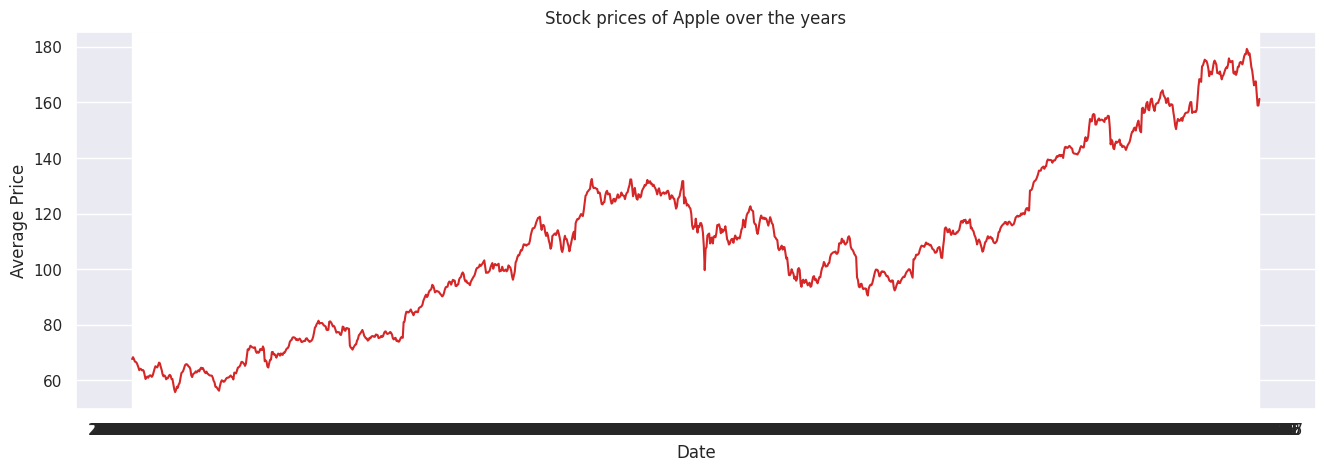

In [ ]:
import matplotlib.pyplot as plt

def plot_df(df4, x, y, title="Stock prices of Apple over the years", xlabel='Date', ylabel='Average Price', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df4, x=df4.date, y=df4.avgPrice, title='Stock prices of Apple over the years')    

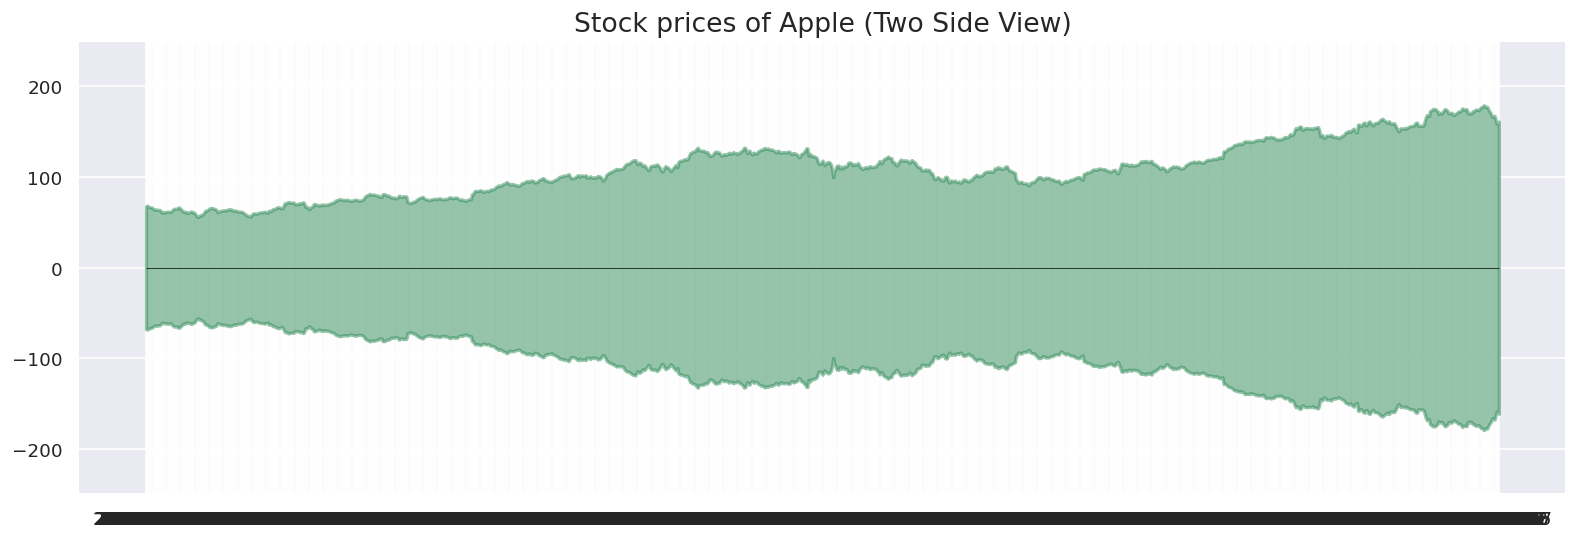

In [ ]:
x = df4['date'].values
y1 = df4['avgPrice'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-250, 250)
plt.title('Stock prices of Apple (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df4.date), xmax=np.max(df4.date), linewidth=.5)
plt.show()

divide the data, test train

In [ ]:
df4['date'] = pd.to_datetime(df4['date'], format='%Y-%m-%d')

In [ ]:
# 1259 = 881 train + 378 test
df_train = df4.head(881)
print(df_train.count())
df_test = df4.loc[881:]
print(df_test.count())

date        881
avgPrice    881
dtype: int64
date        378
avgPrice    378
dtype: int64


In [ ]:
df_train['date'] = df_train.index
df_test['date'] = df_test.index

df_train['train'] = df_train['avgPrice']
df_test['test'] = df_test['avgPrice']

# train = df[df['Date'] < pd.to_datetime("1960-08", format='%Y-%m')]
# train['train'] = train['#Passengers']
del df_train['date']
del df_train['avgPrice']

# del train['#Passengers']
# test = df[df['Date'] >= pd.to_datetime("1960-08", format='%Y-%m')]
del df_test['date']
del df_test['avgPrice']

# test['test'] = test['#Passengers']
# del test['#Passengers']
# plt.plot(train, color = "black")
# plt.plot(test, color = "red")
# plt.title("Train/Test split for Passenger Data")
# plt.ylabel("Passenger Number")
# plt.xlabel('Year-Month')
# sns.set()
# plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
from pmdarima.arima import auto_arima
model = auto_arima(df_train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(df_train)
forecast = model.predict(n_periods=len(df_test))
forecast = pd.DataFrame(forecast,index = df_test.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2945.154, Time=0.97 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2965.673, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2941.434, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2939.569, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2964.753, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2941.312, Time=0.41 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2941.304, Time=0.37 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2943.155, Time=0.88 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2938.375, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2940.142, Time=0.24 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2940.137, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2940.209, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2942.027, Time=0.49 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 4.048 seconds


In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rms = sqrt(mean_squared_error(df_test.test,forecast))
print("RMSE: ", rms)

RMSE:  40.39294730459219


In [ ]:
forecast

,Prediction
881,107.992746
882,107.992746
883,107.992746
884,107.992746
885,107.992746
...,...
1254,107.992746
1255,107.992746
1256,107.992746
1257,107.992746


https://builtin.com/data-science/time-series-python

In [ ]:
df4.head()

,date,avgPrice
0,2013-02-08,67.715650
1,2013-02-11,68.379250
2,2013-02-12,67.769025
3,2013-02-13,66.824200
4,2013-02-14,66.670275


In [ ]:
df5 = df4
df5['date'] = pd.to_datetime(df5['date'], format='%Y %m %d')
df_train1 = df5.head(881)
df_test1 = df5.loc[881:]

In [ ]:
type(df_train1['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
df_test1['date'] = df_test1.index
df_train1['date'] = df_train1.index

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df_train1.head()

,date,avgPrice
0,0,67.715650
1,1,68.379250
2,2,67.769025
3,3,66.824200
4,4,66.670275


In [ ]:
del df_train1['date']
del df_test1['date']

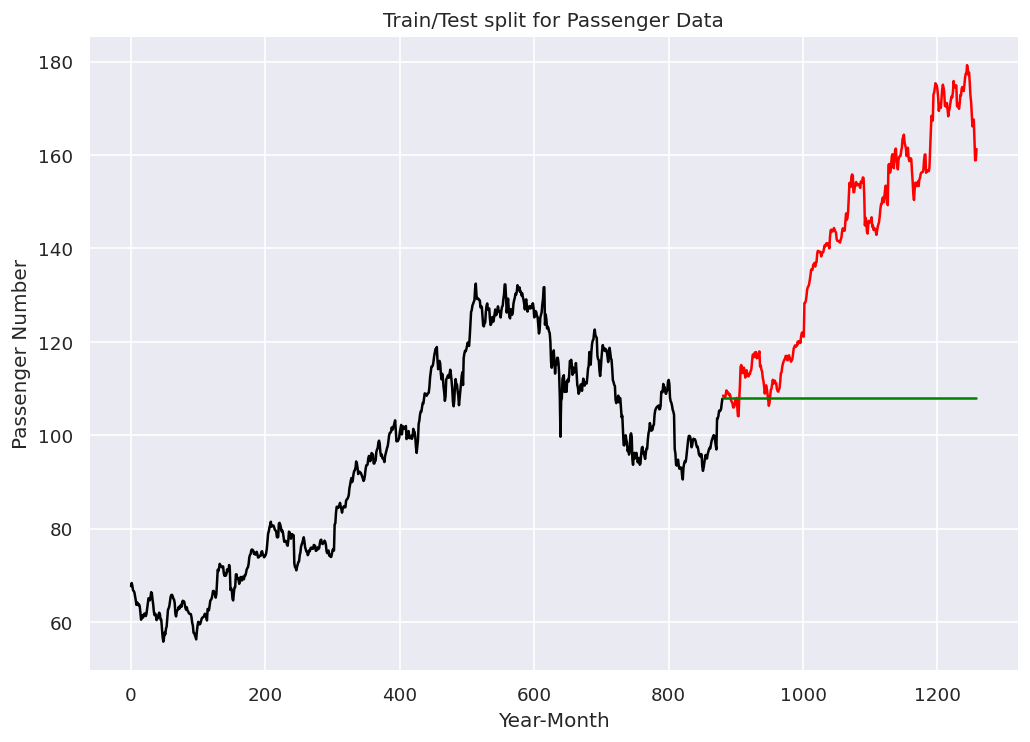

In [ ]:
plt.plot(df_train1, color = "black")
plt.plot(df_test1, color = "red")
plt.plot(forecast, color = "green")
plt.title("Train/Test split for Passenger Data")
plt.ylabel("Passenger Number")
plt.xlabel('Year-Month')
sns.set()
plt.show()

In [ ]:
forecast

,Prediction
881,107.992746
882,107.992746
883,107.992746
884,107.992746
885,107.992746
...,...
1254,107.992746
1255,107.992746
1256,107.992746
1257,107.992746
